## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [4]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [5]:
train, test = keras.datasets.cifar10.load_data()

In [6]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [7]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [8]:
def build_mlp(nurons = [512,256,128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    
    for index,nuron in enumerate(nurons):
        if index == 0:
            x = keras.layers.Dense(units = nuron, activation = 'relu')(input_layer)
        else:
            x = keras.layers.Dense(units = nuron, activation = 'relu')(x)
    output_layer = keras.layers.Dense(units = 10, activation = 'softmax')(x)
    model = keras.models.Model(inputs = [input_layer],outputs = [output_layer])
    return model

In [33]:
"""Code Here
設定超參數
"""
learning_rate = [1e-1,1e-2,1e-3,1e-4,1e-5]
momentum = .85
batch_size = 256
epoch = 50

In [36]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in learning_rate:
    model = build_mlp()
    optimizer = keras.optimizers.SGD(lr = lr,nesterov = True,momentum = momentum)
    model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = optimizer)
    model.fit(x_train,y_train,
             epochs = epoch,
             batch_size = batch_size,
             validation_data = (x_test,y_test),
             shuffle = True)
    
    history = model.history.history
    dict_index = 'lr=%s'%(lr)
    results[dict_index] = {'accuracy':history['accuracy'],
                          'val_accuracy':history['val_accuracy'],
                          'loss':history['loss'],
                          'val_loss':history['val_loss']}

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 113us/step - loss: 2.2599 - accuracy: 0.1732 - val_loss: 2.1394 - val_accuracy: 0.2151
Epoch 2/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.9874 - accuracy: 0.2512 - val_loss: 1.9359 - val_accuracy: 0.2858
Epoch 3/50
50000/50000 [==============================] - 4s 89us/step - loss: 1.8972 - accuracy: 0.3066 - val_loss: 2.0173 - val_accuracy: 0.2654
Epoch 4/50
50000/50000 [==============================] - 5s 93us/step - loss: 1.8439 - accuracy: 0.3348 - val_loss: 1.7908 - val_accuracy: 0.3552
Epoch 5/50
50000/50000 [==============================] - 4s 81us/step - loss: 1.7972 - accuracy: 0.3503 - val_loss: 1.7550 - val_accuracy: 0.3651
Epoch 6/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.7482 - accuracy: 0.3706 - val_loss: 1.6980 - val_accuracy: 0.3852
Epoch 7/50
50000/50000 [==============================] - 4s 79us/s

Epoch 6/50
50000/50000 [==============================] - 4s 90us/step - loss: 1.4462 - accuracy: 0.4887 - val_loss: 1.4975 - val_accuracy: 0.4644
Epoch 7/50
50000/50000 [==============================] - 4s 85us/step - loss: 1.4075 - accuracy: 0.5020 - val_loss: 1.7282 - val_accuracy: 0.4024
Epoch 8/50
50000/50000 [==============================] - 4s 77us/step - loss: 1.3757 - accuracy: 0.5116 - val_loss: 1.5003 - val_accuracy: 0.4660
Epoch 9/50
50000/50000 [==============================] - 4s 89us/step - loss: 1.3508 - accuracy: 0.5225 - val_loss: 1.4506 - val_accuracy: 0.4794
Epoch 10/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.3188 - accuracy: 0.5327 - val_loss: 1.5558 - val_accuracy: 0.4677
Epoch 11/50
50000/50000 [==============================] - 4s 79us/step - loss: 1.2910 - accuracy: 0.5446 - val_loss: 1.3912 - val_accuracy: 0.5067
Epoch 12/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.2710 - accuracy: 0.5503 - val_loss

50000/50000 [==============================] - 4s 76us/step - loss: 1.6271 - accuracy: 0.4333 - val_loss: 1.6279 - val_accuracy: 0.4364
Epoch 12/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.6112 - accuracy: 0.4371 - val_loss: 1.6196 - val_accuracy: 0.4310
Epoch 13/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.5954 - accuracy: 0.4461 - val_loss: 1.6033 - val_accuracy: 0.4401
Epoch 14/50
50000/50000 [==============================] - 4s 76us/step - loss: 1.5818 - accuracy: 0.4476 - val_loss: 1.5934 - val_accuracy: 0.4411
Epoch 15/50
50000/50000 [==============================] - 4s 88us/step - loss: 1.5672 - accuracy: 0.4527 - val_loss: 1.5851 - val_accuracy: 0.4455
Epoch 16/50
50000/50000 [==============================] - 4s 78us/step - loss: 1.5535 - accuracy: 0.4574 - val_loss: 1.5677 - val_accuracy: 0.4527
Epoch 17/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.5408 - accuracy: 0.4629 - val_loss: 1.5651

50000/50000 [==============================] - 4s 81us/step - loss: 1.9229 - accuracy: 0.3318 - val_loss: 1.9200 - val_accuracy: 0.3312
Epoch 17/50
50000/50000 [==============================] - 4s 78us/step - loss: 1.9128 - accuracy: 0.3362 - val_loss: 1.9105 - val_accuracy: 0.3338
Epoch 18/50
50000/50000 [==============================] - 4s 76us/step - loss: 1.9034 - accuracy: 0.3388 - val_loss: 1.9015 - val_accuracy: 0.3357
Epoch 19/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.8946 - accuracy: 0.3424 - val_loss: 1.8924 - val_accuracy: 0.3427
Epoch 20/50
50000/50000 [==============================] - 4s 77us/step - loss: 1.8861 - accuracy: 0.3446 - val_loss: 1.8842 - val_accuracy: 0.3426
Epoch 21/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.8780 - accuracy: 0.3480 - val_loss: 1.8761 - val_accuracy: 0.3473
Epoch 22/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.8703 - accuracy: 0.3508 - val_loss: 1.8689

50000/50000 [==============================] - 4s 76us/step - loss: 2.1698 - accuracy: 0.2233 - val_loss: 2.1663 - val_accuracy: 0.2234
Epoch 22/50
50000/50000 [==============================] - 4s 75us/step - loss: 2.1651 - accuracy: 0.2259 - val_loss: 2.1615 - val_accuracy: 0.2242
Epoch 23/50
50000/50000 [==============================] - 4s 75us/step - loss: 2.1605 - accuracy: 0.2294 - val_loss: 2.1569 - val_accuracy: 0.2283
Epoch 24/50
50000/50000 [==============================] - 4s 77us/step - loss: 2.1559 - accuracy: 0.2325 - val_loss: 2.1523 - val_accuracy: 0.2305
Epoch 25/50
50000/50000 [==============================] - 4s 75us/step - loss: 2.1514 - accuracy: 0.2351 - val_loss: 2.1478 - val_accuracy: 0.2324
Epoch 26/50
50000/50000 [==============================] - 4s 75us/step - loss: 2.1470 - accuracy: 0.2366 - val_loss: 2.1434 - val_accuracy: 0.2339
Epoch 27/50
50000/50000 [==============================] - 4s 77us/step - loss: 2.1427 - accuracy: 0.2397 - val_loss: 2.1391

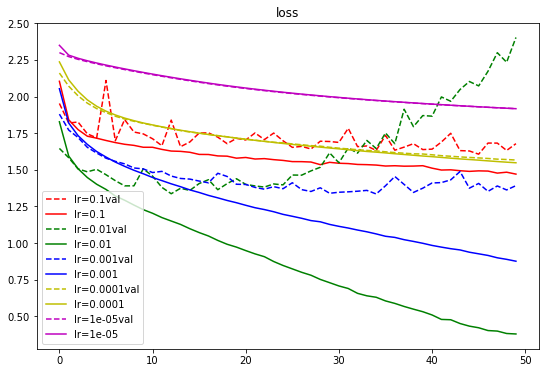

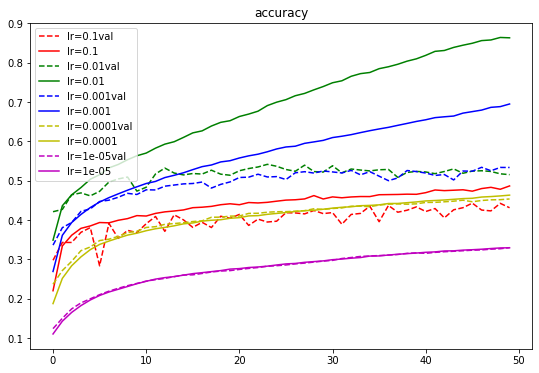

In [30]:
#momentum .95,nesterov True
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color = ['r','g','b','y','m','k']
plt.figure(figsize = (9,6))
for i,index in enumerate(results.keys()):
    plt.plot(range(len(results[index]['val_loss'])),results[index]['val_loss'],'--',c = color[i],label = index + 'val')
    plt.plot(range(len(results[index]['loss'])),results[index]['loss'],'-',c = color[i],label = index)
plt.legend()
plt.title('loss')
plt.show()

plt.figure(figsize = (9,6))
for i,index in enumerate(results.keys()):
    plt.plot(range(len(results[index]['val_accuracy'])),results[index]['val_accuracy'],'--',c = color[i], label = index + 'val')
    plt.plot(range(len(results[index]['accuracy'])),results[index]['accuracy'],'-',c = color[i], label = index)
    
plt.legend()
plt.title('accuracy')
plt.show()

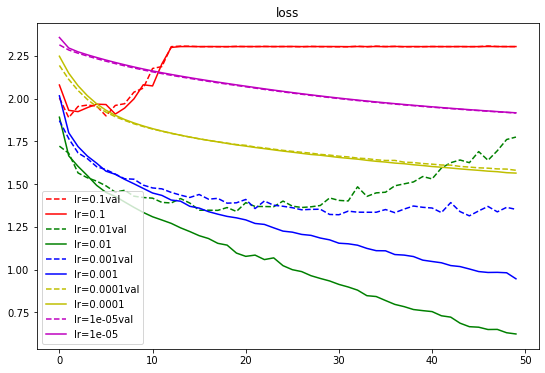

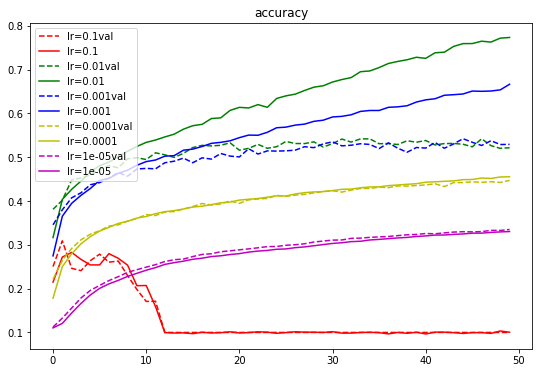

In [32]:
#momentum .95,nesterov False
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color = ['r','g','b','y','m','k']
plt.figure(figsize = (9,6))
for i,index in enumerate(results.keys()):
    plt.plot(range(len(results[index]['val_loss'])),results[index]['val_loss'],'--',c = color[i],label = index + 'val')
    plt.plot(range(len(results[index]['loss'])),results[index]['loss'],'-',c = color[i],label = index)
plt.legend()
plt.title('loss')
plt.show()

plt.figure(figsize = (9,6))
for i,index in enumerate(results.keys()):
    plt.plot(range(len(results[index]['val_accuracy'])),results[index]['val_accuracy'],'--',c = color[i], label = index + 'val')
    plt.plot(range(len(results[index]['accuracy'])),results[index]['accuracy'],'-',c = color[i], label = index)
    
plt.legend()
plt.title('accuracy')
plt.show()

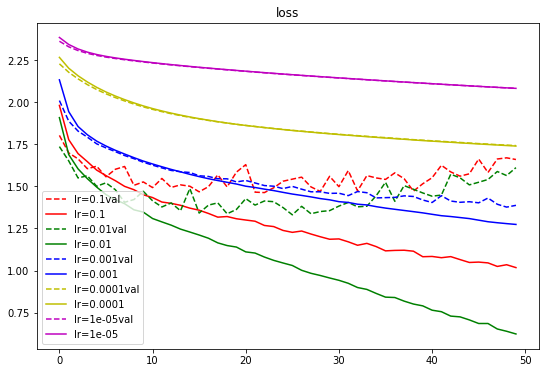

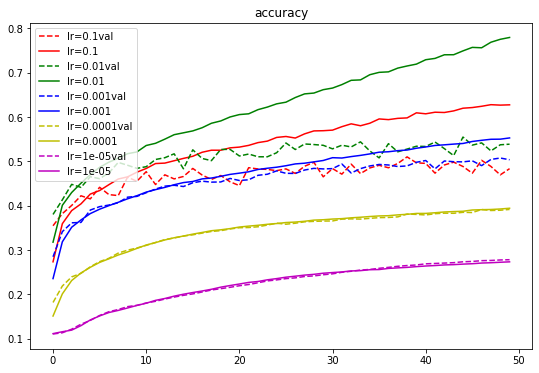

In [35]:
#momentum .85,nesterov False
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color = ['r','g','b','y','m','k']
plt.figure(figsize = (9,6))
for i,index in enumerate(results.keys()):
    plt.plot(range(len(results[index]['val_loss'])),results[index]['val_loss'],'--',c = color[i],label = index + 'val')
    plt.plot(range(len(results[index]['loss'])),results[index]['loss'],'-',c = color[i],label = index)
plt.legend()
plt.title('loss')
plt.show()

plt.figure(figsize = (9,6))
for i,index in enumerate(results.keys()):
    plt.plot(range(len(results[index]['val_accuracy'])),results[index]['val_accuracy'],'--',c = color[i], label = index + 'val')
    plt.plot(range(len(results[index]['accuracy'])),results[index]['accuracy'],'-',c = color[i], label = index)
    
plt.legend()
plt.title('accuracy')
plt.show()

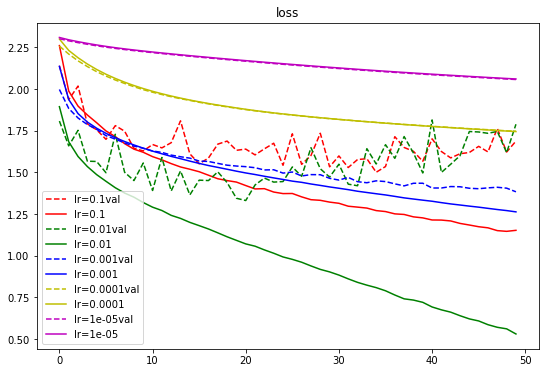

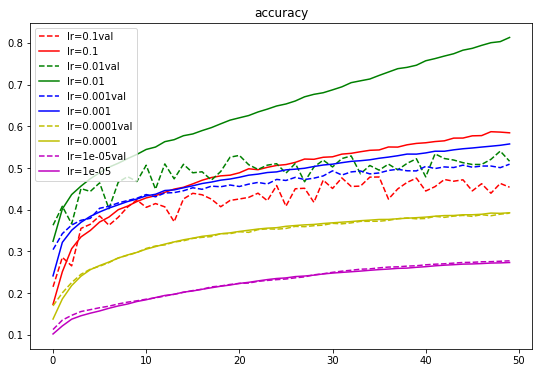

In [37]:
#momentum .85,nesterov True
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color = ['r','g','b','y','m','k']
plt.figure(figsize = (9,6))
for i,index in enumerate(results.keys()):
    plt.plot(range(len(results[index]['val_loss'])),results[index]['val_loss'],'--',c = color[i],label = index + 'val')
    plt.plot(range(len(results[index]['loss'])),results[index]['loss'],'-',c = color[i],label = index)
plt.legend()
plt.title('loss')
plt.show()

plt.figure(figsize = (9,6))
for i,index in enumerate(results.keys()):
    plt.plot(range(len(results[index]['val_accuracy'])),results[index]['val_accuracy'],'--',c = color[i], label = index + 'val')
    plt.plot(range(len(results[index]['accuracy'])),results[index]['accuracy'],'-',c = color[i], label = index)
    
plt.legend()
plt.title('accuracy')
plt.show()